<h1>Analyze weather dataset</h1>

<h4>Gathering data</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

weather_df = pd.read_csv("weather.csv")
print(weather_df)

             Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      Visibility_km  Press_kPa         

<h4>Assesing data</h4>

In [2]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [3]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


<p>data sudah bersih, tidak ada data yang missing value dan sebagainya jadi kita bisa melewati tahapan cleaning data</p>

<h4>Explore data weather.csv</h4>

In [4]:
weather_df.describe(include="all")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784
unique,8784,NaN,NaN,NaN,NaN,NaN,NaN,50
top,1/1/2012 0:00,NaN,NaN,NaN,NaN,NaN,NaN,Mainly Clear
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,2106
mean,NaN,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623,NaN
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005,NaN
min,NaN,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000,NaN
25%,NaN,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000,NaN
50%,NaN,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000,NaN
75%,NaN,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000,NaN


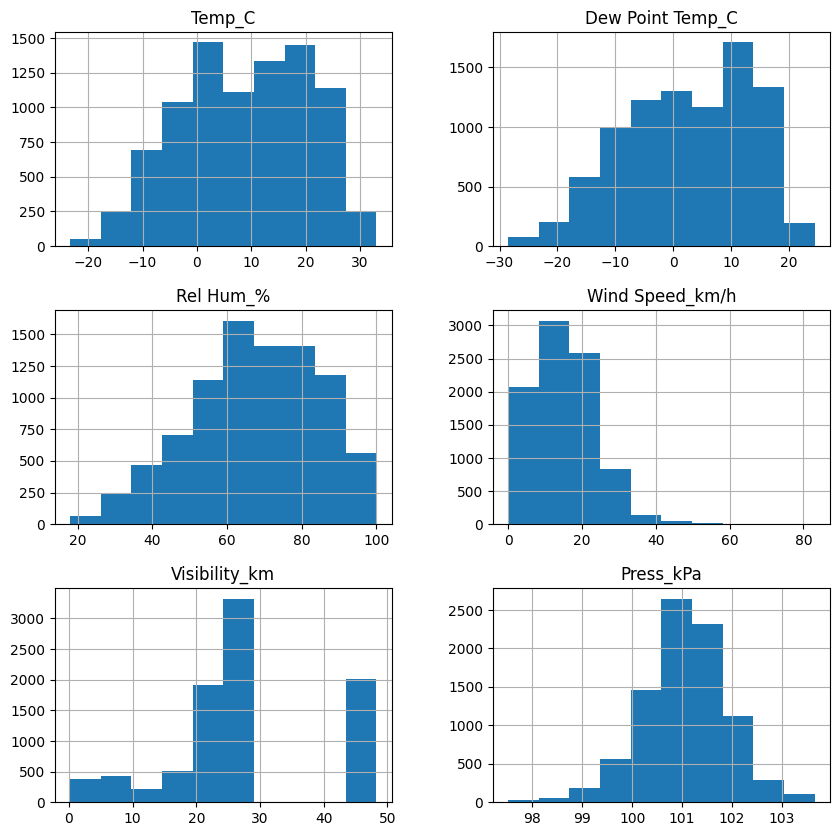

In [5]:
weather_df.hist(figsize=(10, 10))
plt.show()

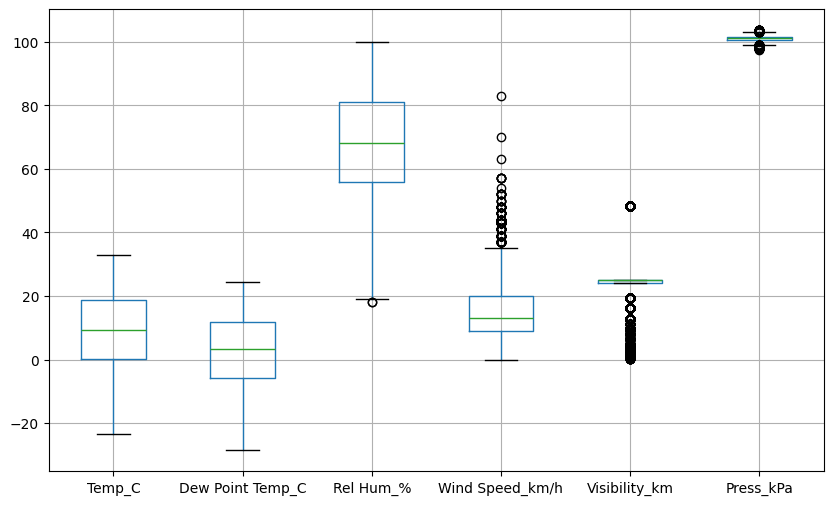

In [6]:
weather_df.boxplot(figsize=(10, 6))
plt.show()

<p>dalam membuat visualisasi korelasi kita tidak bisa menggunakan kolom bertipe data date, oleh karena itu kita akan ubah terlebih dahulu tipe data date dengan mengekstrasi nya<p>

In [7]:
import pandas as pd

data = pd.read_csv('weather.csv')

# Mengonversi kolom 'Date/Time' ke format datetime
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

# Mengekstrak informasi waktu
data['Month'] = data['Date/Time'].dt.month  # Ekstrak bulan
data['DayOfWeek'] = data['Date/Time'].dt.dayofweek  # Ekstrak hari dalam seminggu (0: Senin - 6: Minggu)
data['Hour'] = data['Date/Time'].dt.hour  # Ekstrak jam

# Contoh ekstraksi musim (jika tanggal menyertakan informasi musim)
def get_season(month):
    if month in [1]:
        return 'January'
    elif month in [2]:
        return 'February'
    elif month in [3]:
        return 'March'
    elif month in [4]:
        return 'April'
    elif month in [5]:
        return 'May'
    elif month in [6]:
        return 'June'
    elif month in [7]:
        return 'July'
    elif month in [8]:
        return 'August'
    elif month in [9]:
        return 'September'
    elif month in [10]:
        return 'October'
    elif month in [11]:
        return 'November'
    elif month in [12]:
        return 'December'
    else:
        return 'null'

data['Month'] = data['Month'].apply(get_season)

# Menampilkan lima baris pertama data untuk memeriksa perubahan
print(data.head())


            Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0 2012-01-01 00:00:00    -1.8              -3.9         86                4   
1 2012-01-01 01:00:00    -1.8              -3.7         87                4   
2 2012-01-01 02:00:00    -1.8              -3.4         89                7   
3 2012-01-01 03:00:00    -1.5              -3.2         88                6   
4 2012-01-01 04:00:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather    Month  DayOfWeek  Hour  
0            8.0     101.24                   Fog  January          6     0  
1            8.0     101.24                   Fog  January          6     1  
2            4.0     101.26  Freezing Drizzle,Fog  January          6     2  
3            4.0     101.27  Freezing Drizzle,Fog  January          6     3  
4            4.8     101.23                   Fog  January          6     4  


In [8]:
bulan_angka = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

data['Month'] = data['Month'].map(bulan_angka)

numerical_columns = data.select_dtypes(include='number').columns.tolist()
data_numeric = data[numerical_columns]

# Menghitung korelasi untuk data numerik
correlation = data_numeric.corr()
print(correlation)


                    Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
Temp_C            1.000000          0.932714  -0.220182        -0.061876   
Dew Point Temp_C  0.932714          1.000000   0.139494        -0.095685   
Rel Hum_%        -0.220182          0.139494   1.000000        -0.092743   
Wind Speed_km/h  -0.061876         -0.095685  -0.092743         1.000000   
Visibility_km     0.273455          0.050813  -0.633683         0.004883   
Press_kPa        -0.236389         -0.320616  -0.231424        -0.356613   
Month             0.218048          0.299641   0.232040        -0.030506   
DayOfWeek        -0.021267         -0.041781  -0.046595         0.005432   
Hour              0.106888          0.017201  -0.243502         0.077594   

                  Visibility_km  Press_kPa         Month     DayOfWeek  \
Temp_C                 0.273455  -0.236389  2.180482e-01 -2.126724e-02   
Dew Point Temp_C       0.050813  -0.320616  2.996407e-01 -4.178075e-02   
Rel Hum_%        

<h5>Korelasi Visualisasi menggunakan heatmap</h5>

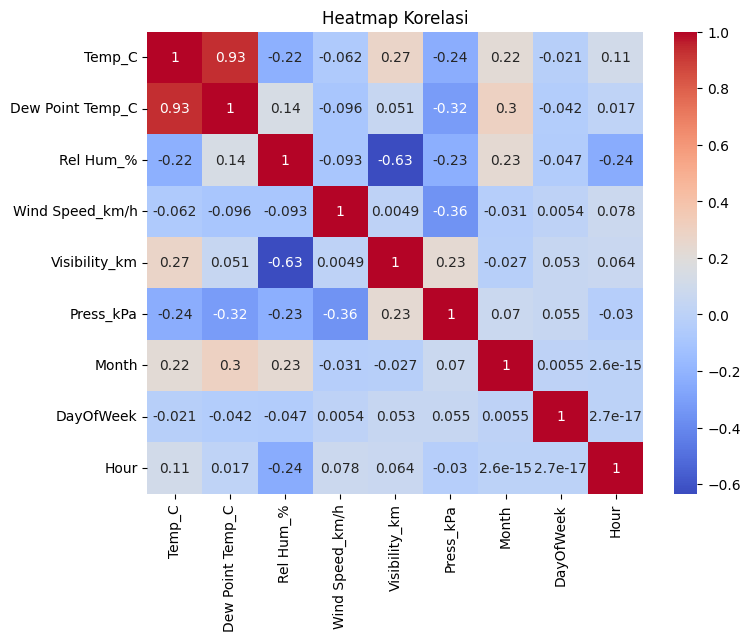

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

<p>Setelah menganalisa korelasi visualisasi menggunakan heatmap dan beberapa analisa data lainnya maka didapatkan beberapa pertanyaan berdasarkan data diatas yang perlu dijawab</p>

<h3>Q1 : Trend suhu dan Titik embun</h3>

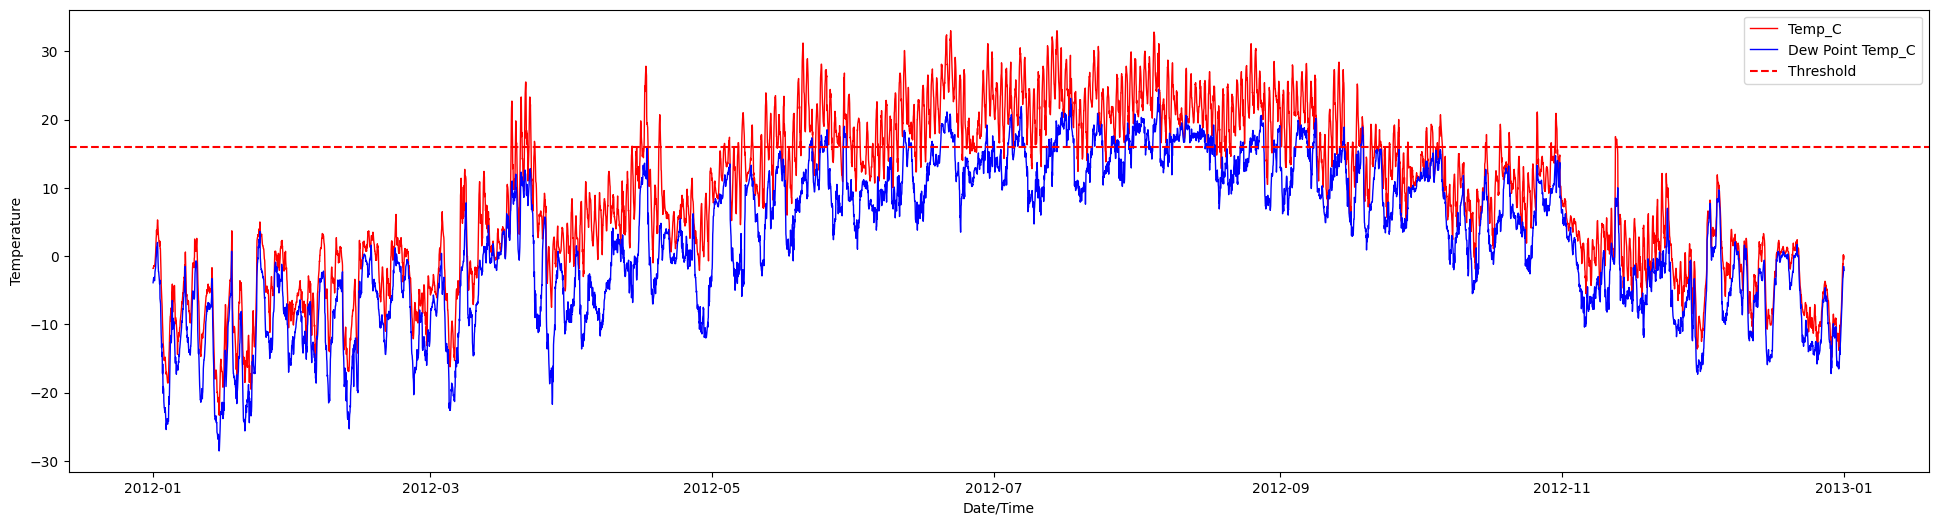

In [11]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(24, 6))
plt.plot(data['Date/Time'], data['Temp_C'], color = 'red', linewidth=1, label="Temp_C")
plt.plot(data['Date/Time'], data['Dew Point Temp_C'], color='blue', linewidth = 1, label='Dew Point Temp_C')
plt.axhline(y=16, color='red', linestyle='--', label='Threshold')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<h3>Q2 : Korelasi antara suhu, titik embun dan kelembapan</h3>

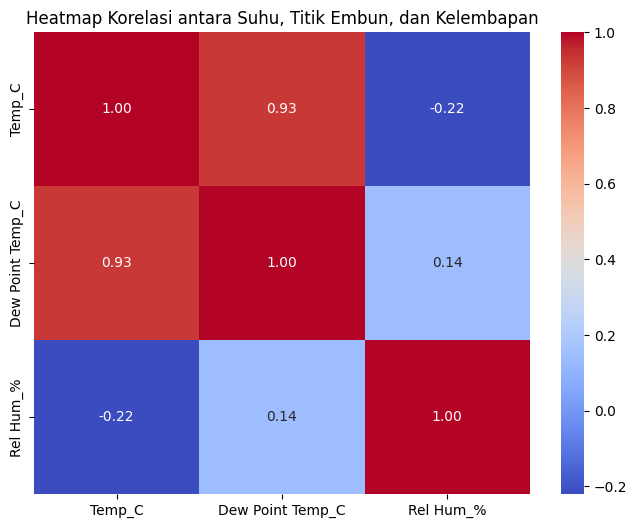

In [12]:
import seaborn as sns

# Menghitung matriks korelasi antara ketiga variabel
corr_matrix = data[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%']].corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antara Suhu, Titik Embun, dan Kelembapan')
plt.show()

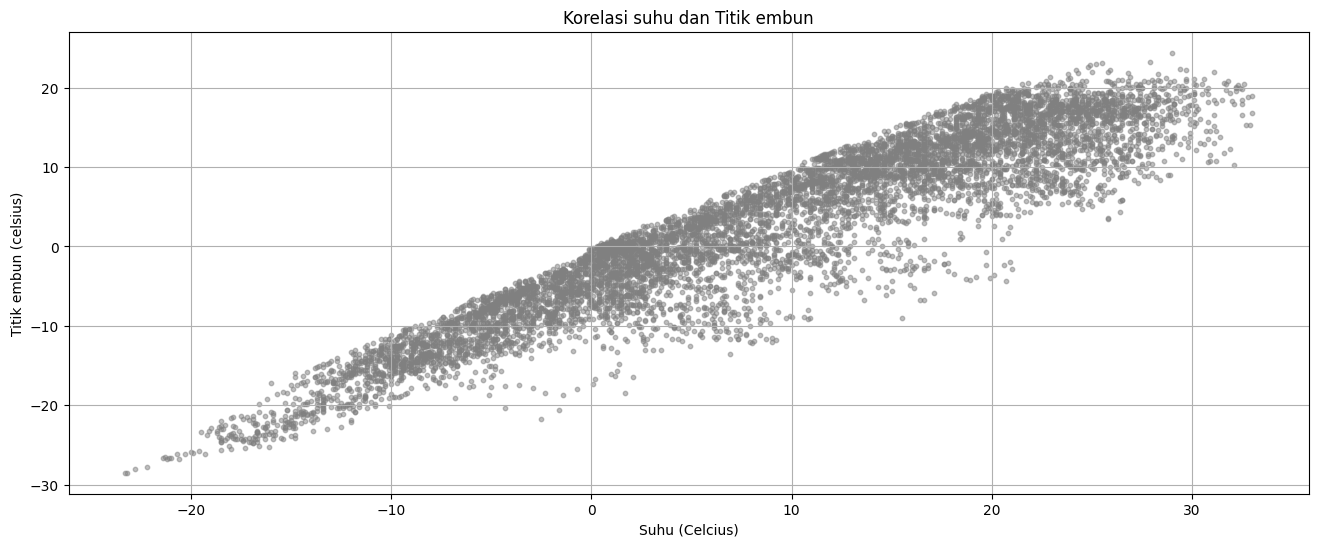

In [13]:
plt.figure(figsize=(16, 6))
plt.scatter(data['Temp_C'], data['Dew Point Temp_C'], s=10, alpha=0.5, color='grey')
plt.title('Korelasi suhu dan Titik embun')
plt.xlabel('Suhu (Celcius)')
plt.ylabel('Titik embun (celsius)')
plt.grid(True)
plt.show()

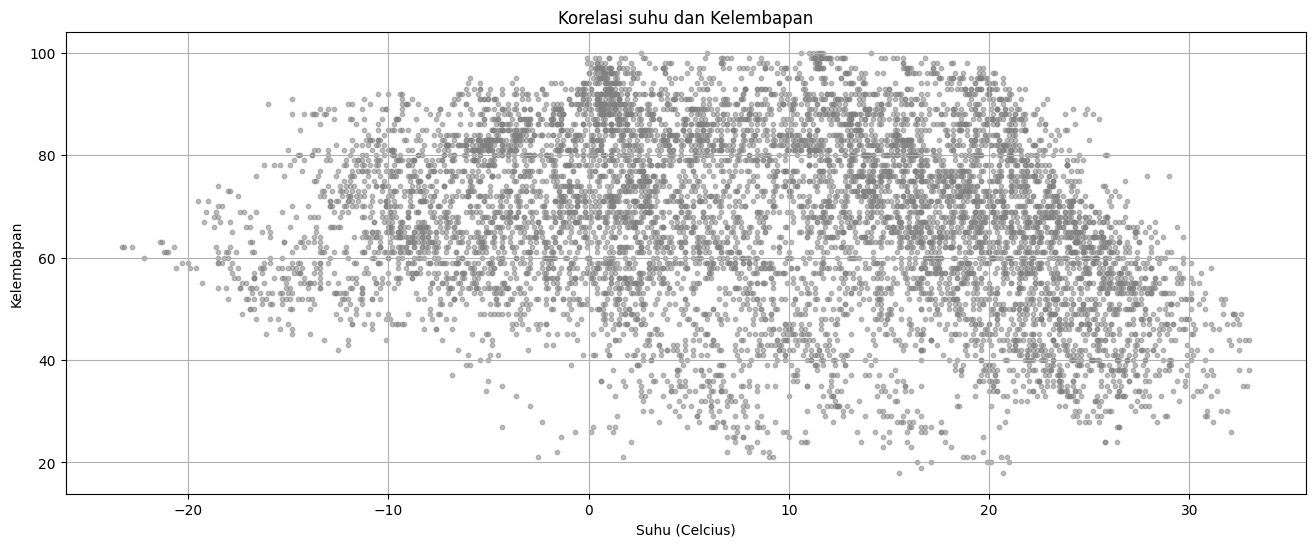

In [14]:
plt.figure(figsize=(16, 6))
plt.scatter(data['Temp_C'], data['Rel Hum_%'], s=10, alpha=0.5, color='grey')
plt.title('Korelasi suhu dan Kelembapan')
plt.xlabel('Suhu (Celcius)')
plt.ylabel('Kelembapan')
plt.grid(True)
plt.show()

<h3>Q3 : Pengaruh cuaca terhadap visibilitas</h3>

<p>Mari kita lihat bagaimana hubungan visibility dengan kolom-kolom data yang ada</p>

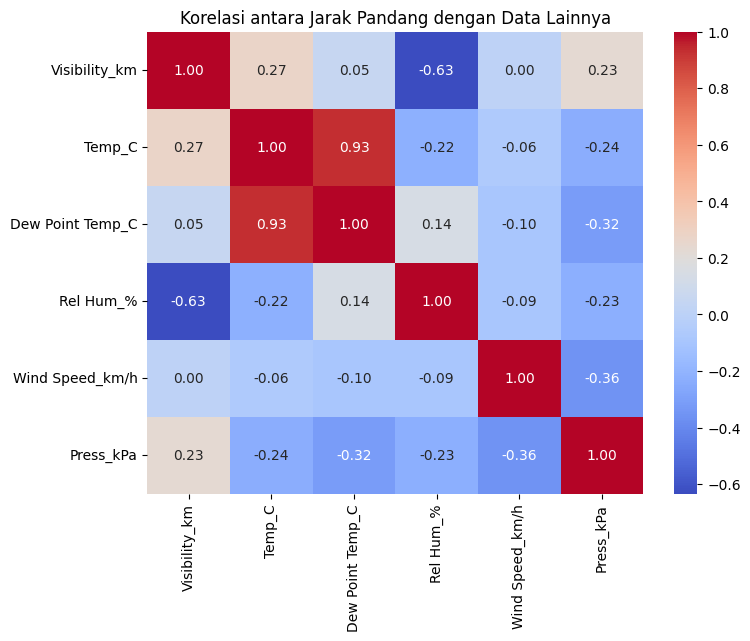

In [15]:
columns_to_analyze = ['Visibility_km', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Press_kPa']

corr_visibility = data[columns_to_analyze].corr()

# Plot matriks korelasi sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_visibility, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Korelasi antara Jarak Pandang dengan Data Lainnya")
plt.show()




<p>berdasarkan data diatas dapat dilihat bahwa jarak pandang berkorelasi negatif cukup kuat dengan tingkat kelembapan (-0.063)</p>

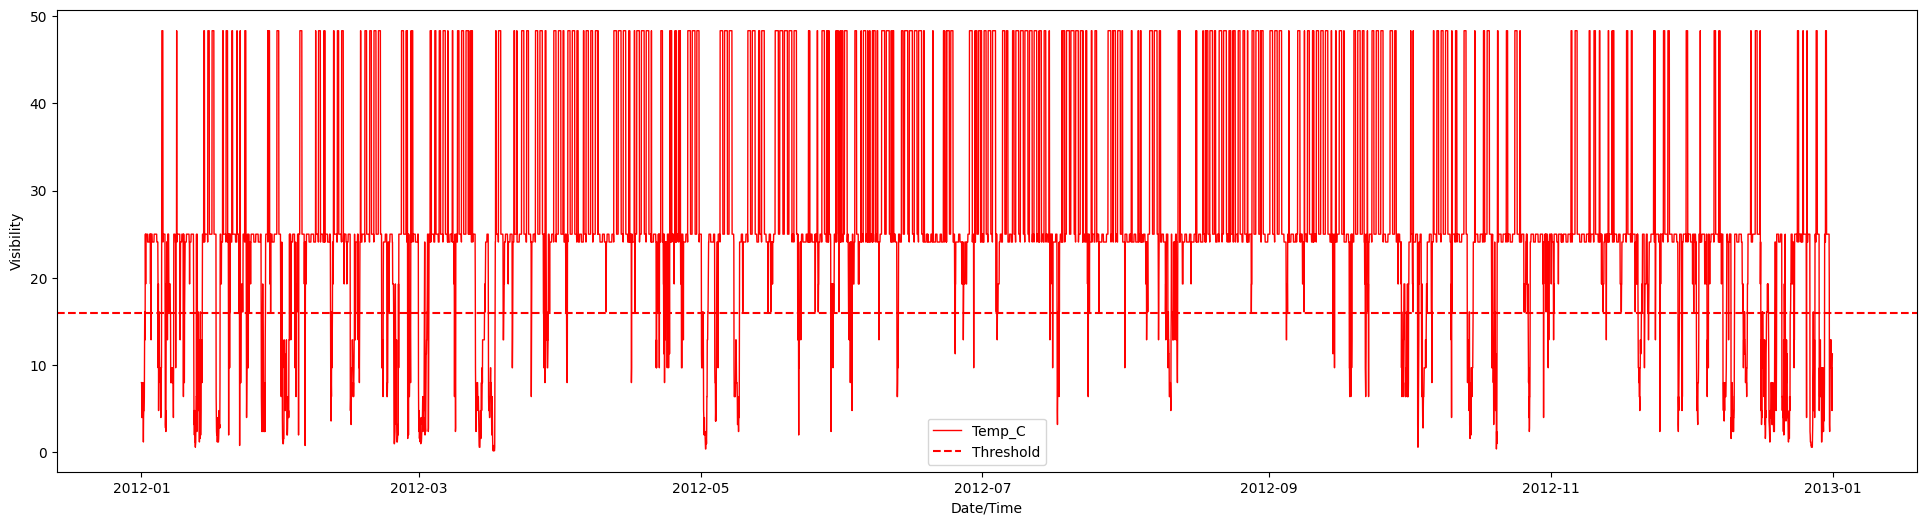

In [16]:
plt.figure(figsize=(24, 6))
plt.plot(data['Date/Time'], data['Visibility_km'], color = 'red', linewidth=1, label="Temp_C")
plt.axhline(y=16, color='red', linestyle='--', label='Threshold')
plt.xlabel('Date/Time')
plt.ylabel('Visibility')
plt.legend()
plt.show()

<p>setelah dilihat pada grafik plot diatas bahwa tidak ada pola atau tren tertentu terkait dengan tingkat visibility penduduk</p>

<h3>Q4 : Korelasi Antara Kecepatan Angin dan Tekanan Atmosfer</h3>

In [17]:
correlation_wind_press = data['Wind Speed_km/h'].corr(data['Press_kPa'])
print("Korelasi antara kecepatan angin dan tekanan atmosfer adalah ", correlation_wind_press)

Korelasi antara kecepatan angin dan tekanan atmosfer adalah  -0.35661310354581305


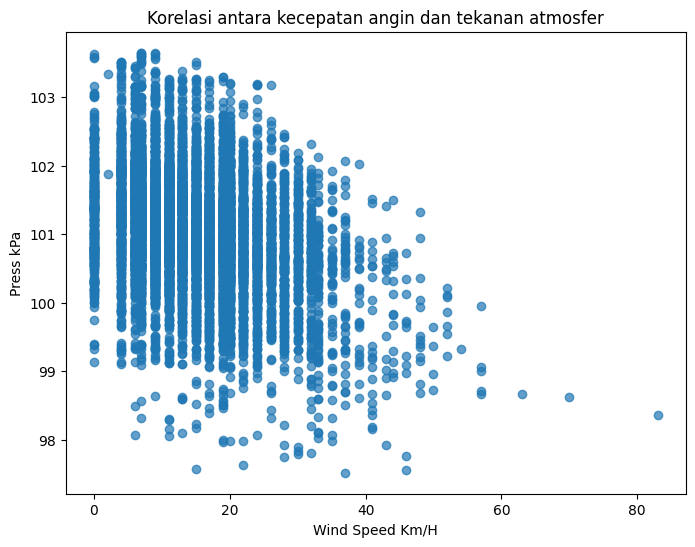

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Wind Speed_km/h'],data['Press_kPa'], alpha=0.7)
plt.xlabel("Wind Speed Km/H")
plt.ylabel('Press kPa')
plt.title("Korelasi antara kecepatan angin dan tekanan atmosfer")
plt.show()

<p>
Analisis korelasi antara kecepatan angin dan tekanan atmosfer menunjukkan ketiadaan hubungan yang signifikan antara kedua variabel tersebut dalam dataset yang dianalisis. Hal ini menunjukkan independensi antara kecepatan angin dan tekanan atmosfer, mengindikasikan bahwa variasi dalam kecepatan angin tidak memiliki korelasi linier langsung dengan variasi dalam tekanan atmosfer. Meskipun hasil ini menunjukkan ketiadaan hubungan, tidak menutup kemungkinan adanya hubungan yang lebih kompleks atau faktor lain yang memengaruhi kedua variabel dalam dinamika cuaca, membutuhkan penelitian lanjutan atau metode analisis tambahan untuk pemahaman yang lebih mendalam.</p>

<h3>Q5 : Pola Cuaca Selama 1 Tahun</h3>

<p>Grafik Pola suhu selama satu tahun</p>

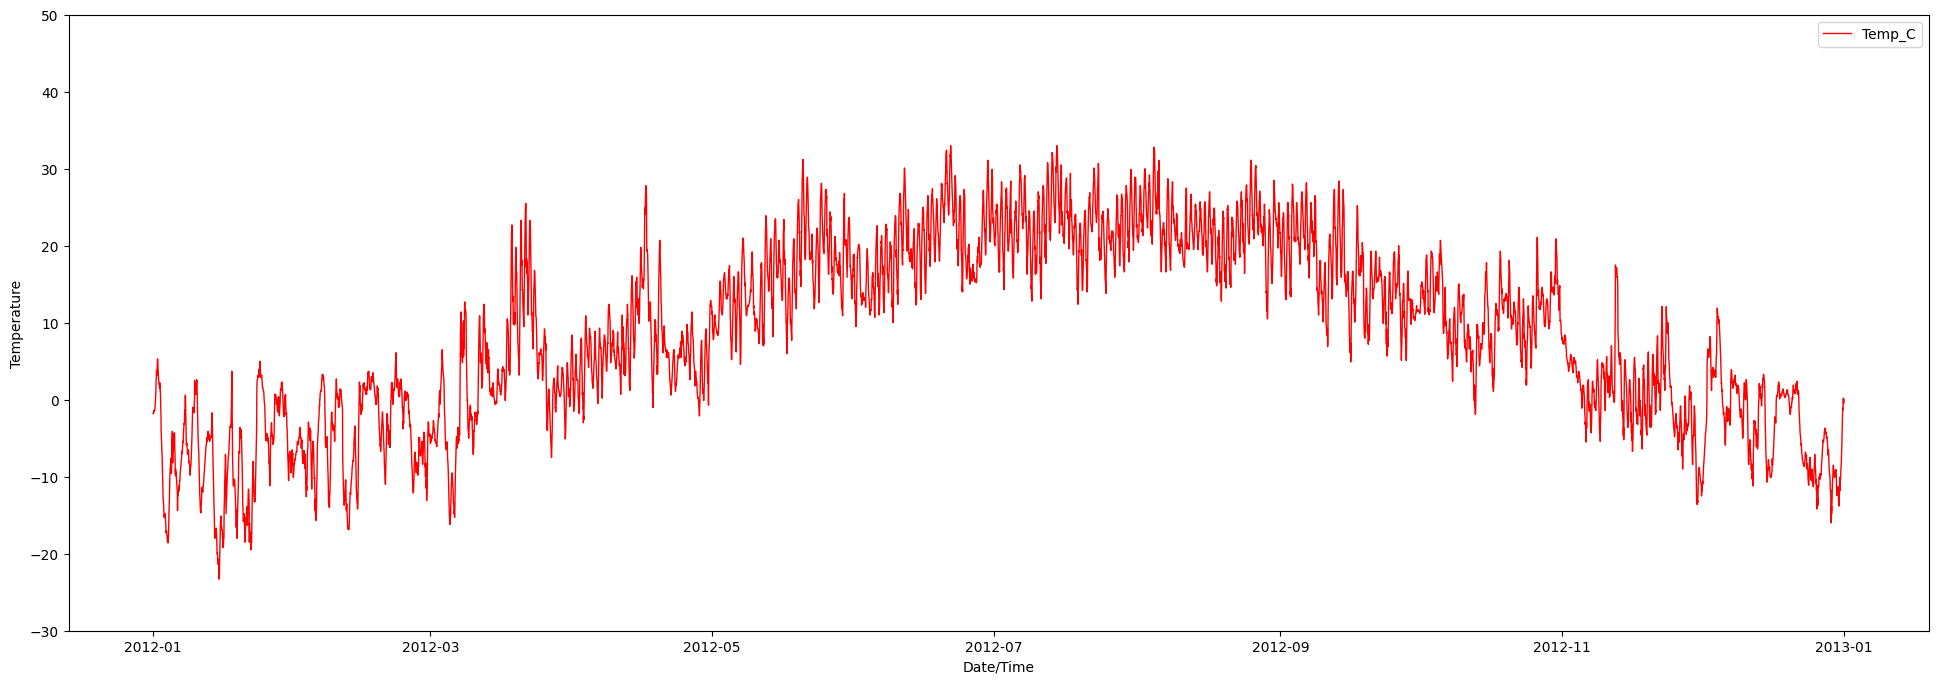

In [19]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Temp_C'], color = 'red', linewidth=1, label="Temp_C")
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.legend()
plt.ylim(-30, 50)
plt.show()

<p>Grafik pola titik embun selama setahun</p>

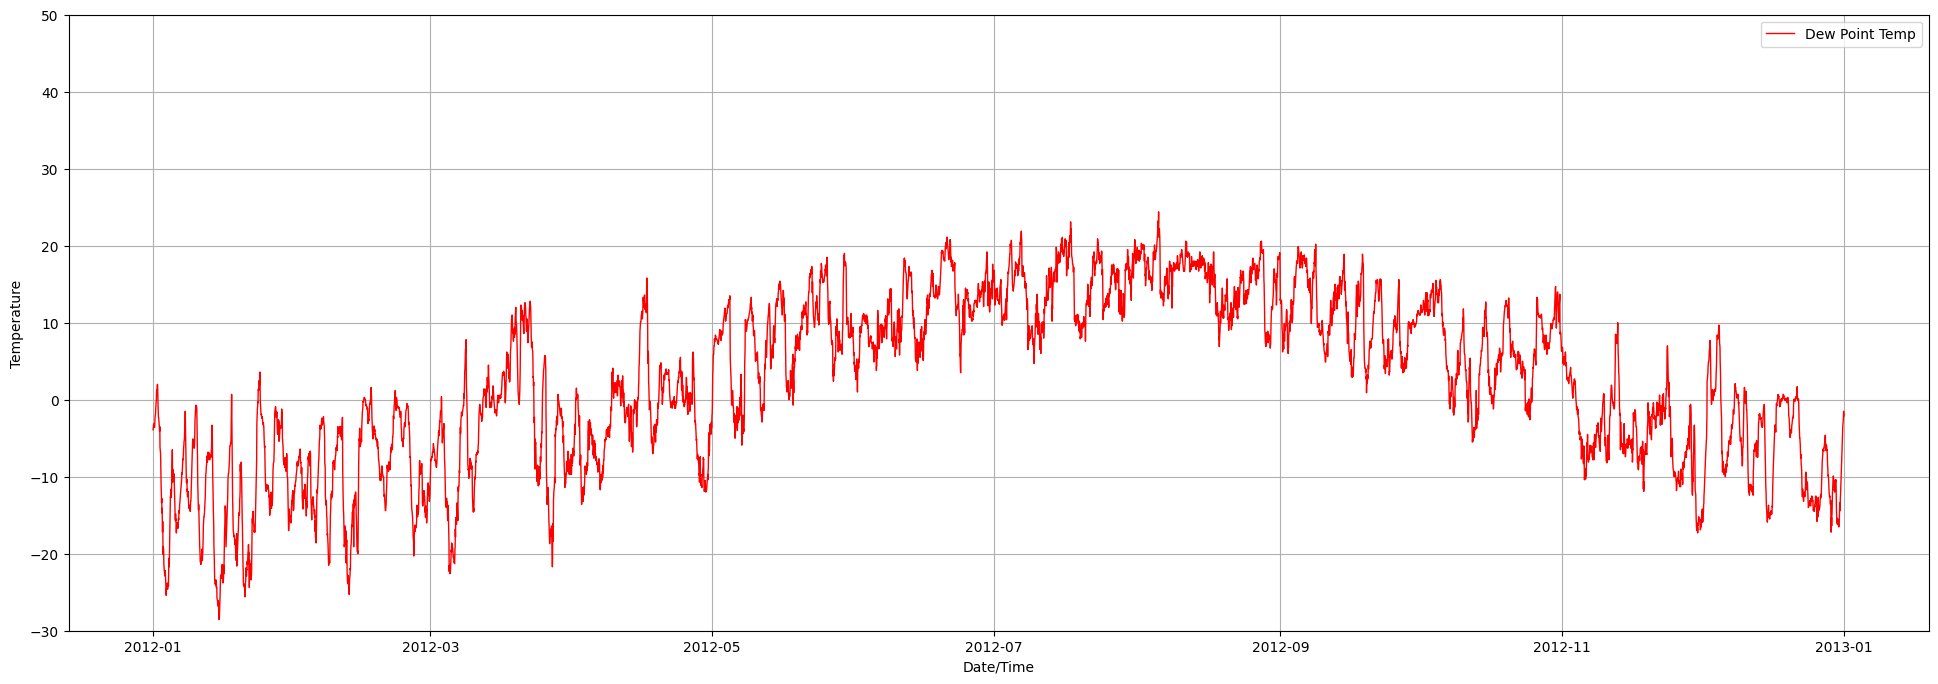

In [20]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Dew Point Temp_C'], color = 'red', linewidth=1, label="Dew Point Temp")
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.grid()
plt.legend()
plt.ylim(-30, 50)
plt.show()

 <p>grafik pola tingkat kelembapan(%) selama satu tahun</p>

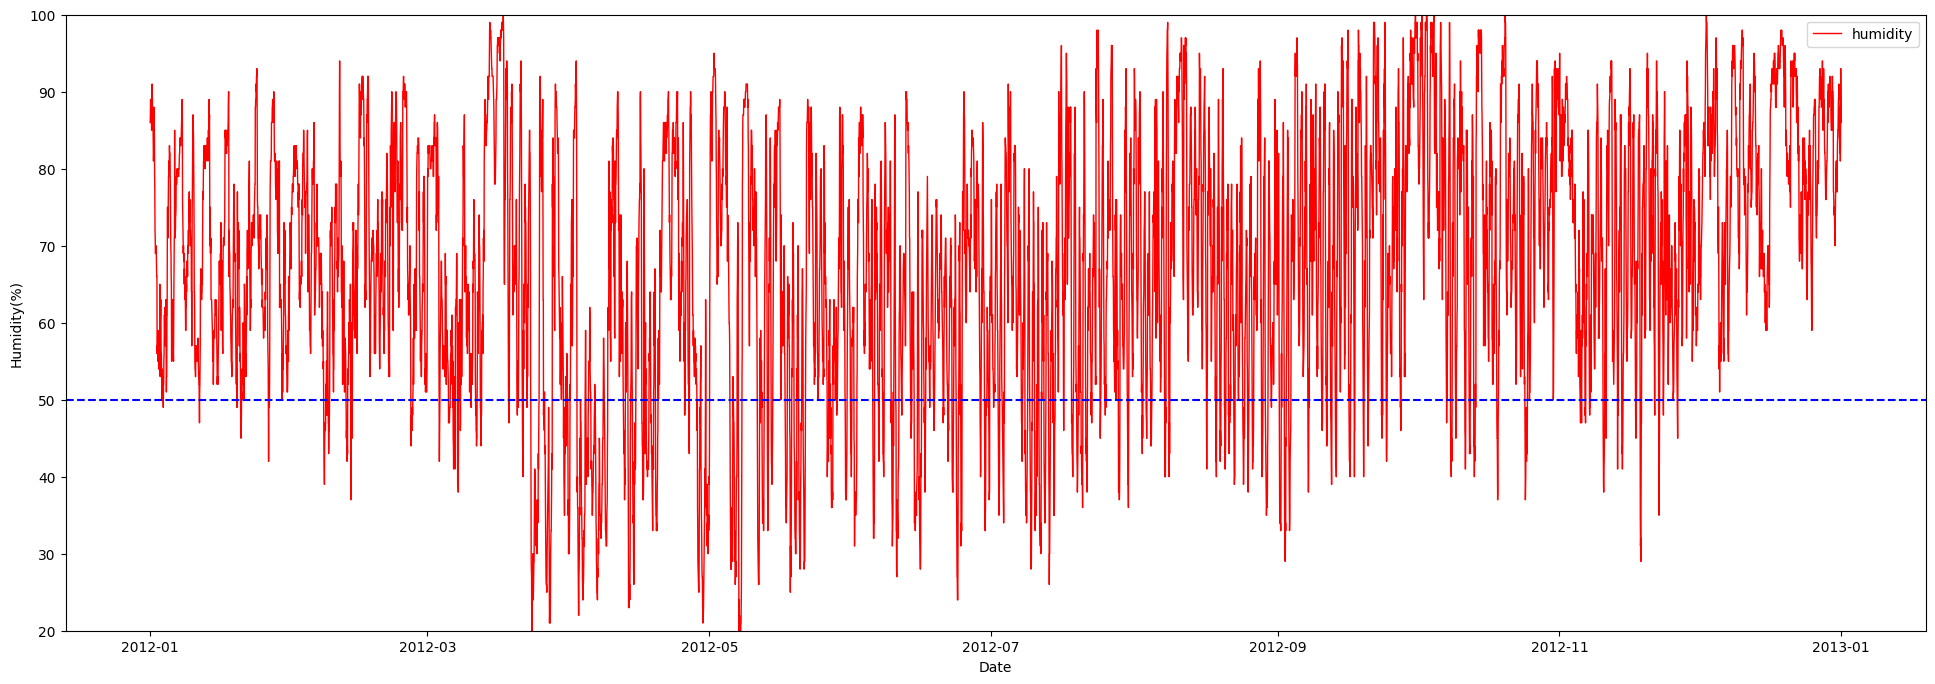

In [21]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Rel Hum_%'], color='red', linewidth= 1, label='humidity')
plt.xlabel('Date')
plt.ylabel('Humidity(%)')
plt.legend()
plt.axhline(y=50, color='blue', linestyle='--', label='Threshold')
plt.ylim(20,100)
plt.show()


<p>Grafik pola kecepatan angin selama setahun</p>

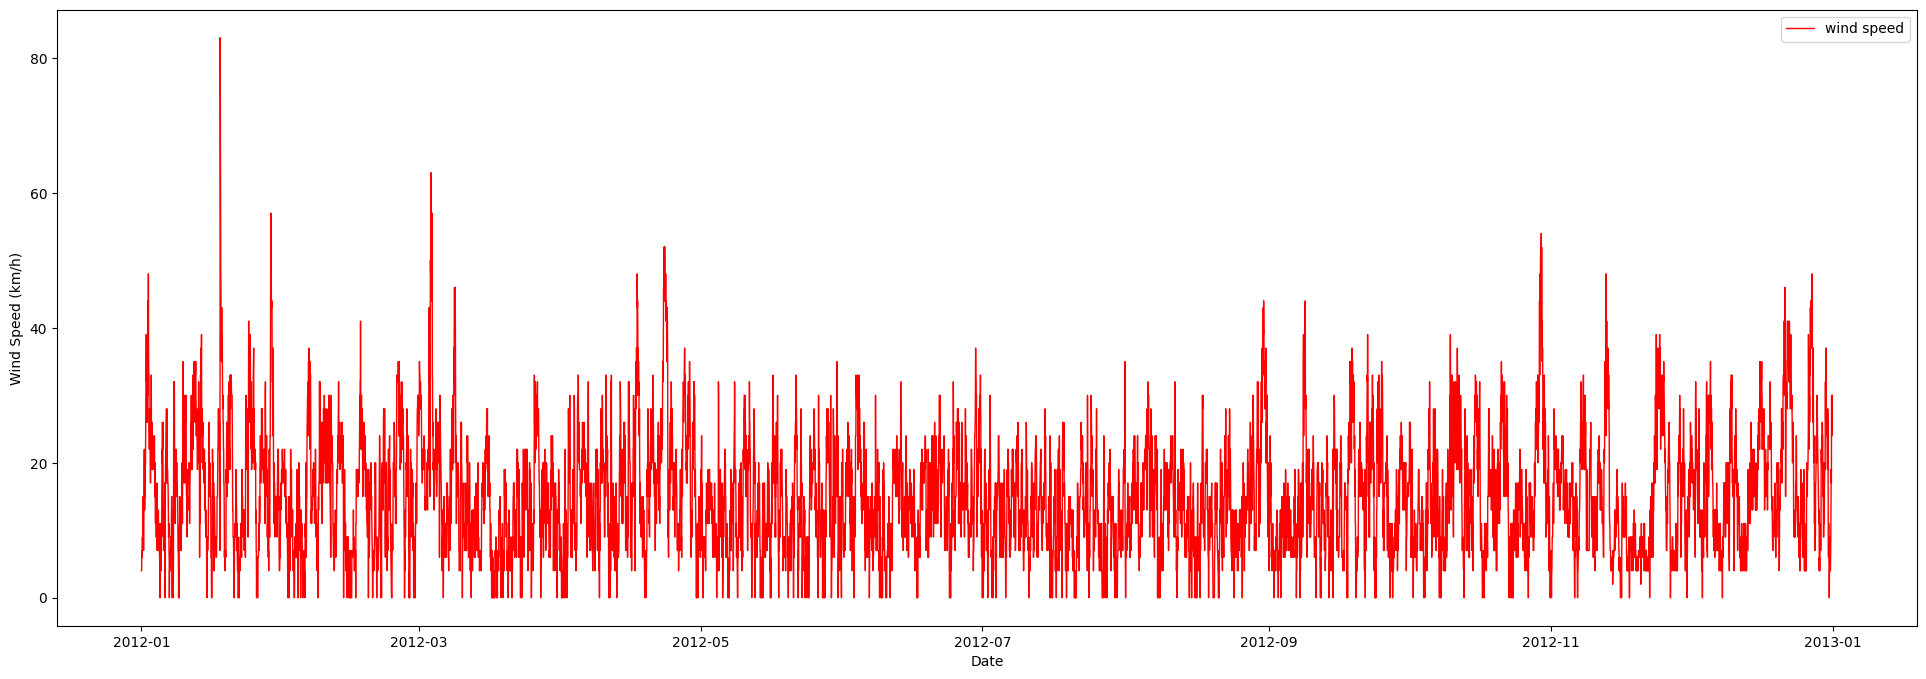

In [22]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Wind Speed_km/h'], color='red', linewidth= 1, label='wind speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (km/h)')
plt.legend()
plt.show()

<p>Jika dilihat diatas bahwa kecepatan angin di sepanjang tahun tidak menciptakan pola yang berarti namun selalu ada lonjakan kecepatan angin yang sangat tinggi pada bulan ganjil</p>

<p><b>Grafik pola jarak penglihatan manusia sepanjang tahun</b></p>

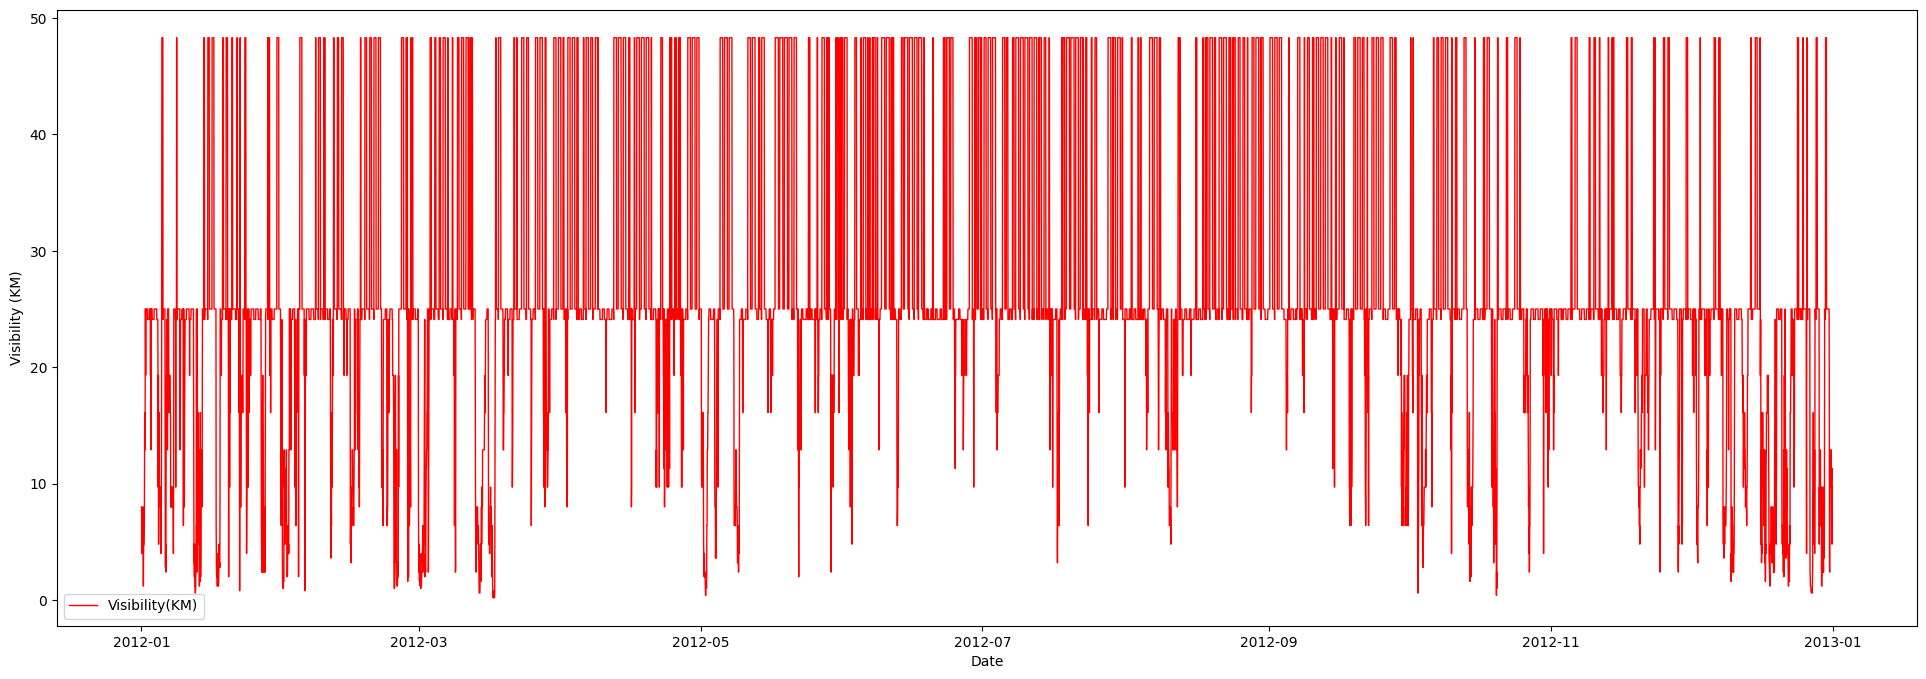

In [23]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Visibility_km'], color='red', linewidth= 1, label='Visibility(KM)')
plt.xlabel('Date')
plt.ylabel('Visibility (KM)')
plt.legend()
plt.show()

<p>Tingkat visibility mempunyai korelasi dengan tingkat kelembapan udara, dikarenakan tingkat kelembapan yang tidak mempunyai pola tertentu dapat kita lihat bahwa pola visibility sepanjang tahun juga tidak mempunyai pola tertentu</P>

<p><b>Grafik Pola Tekanan atmosfer</b></P>

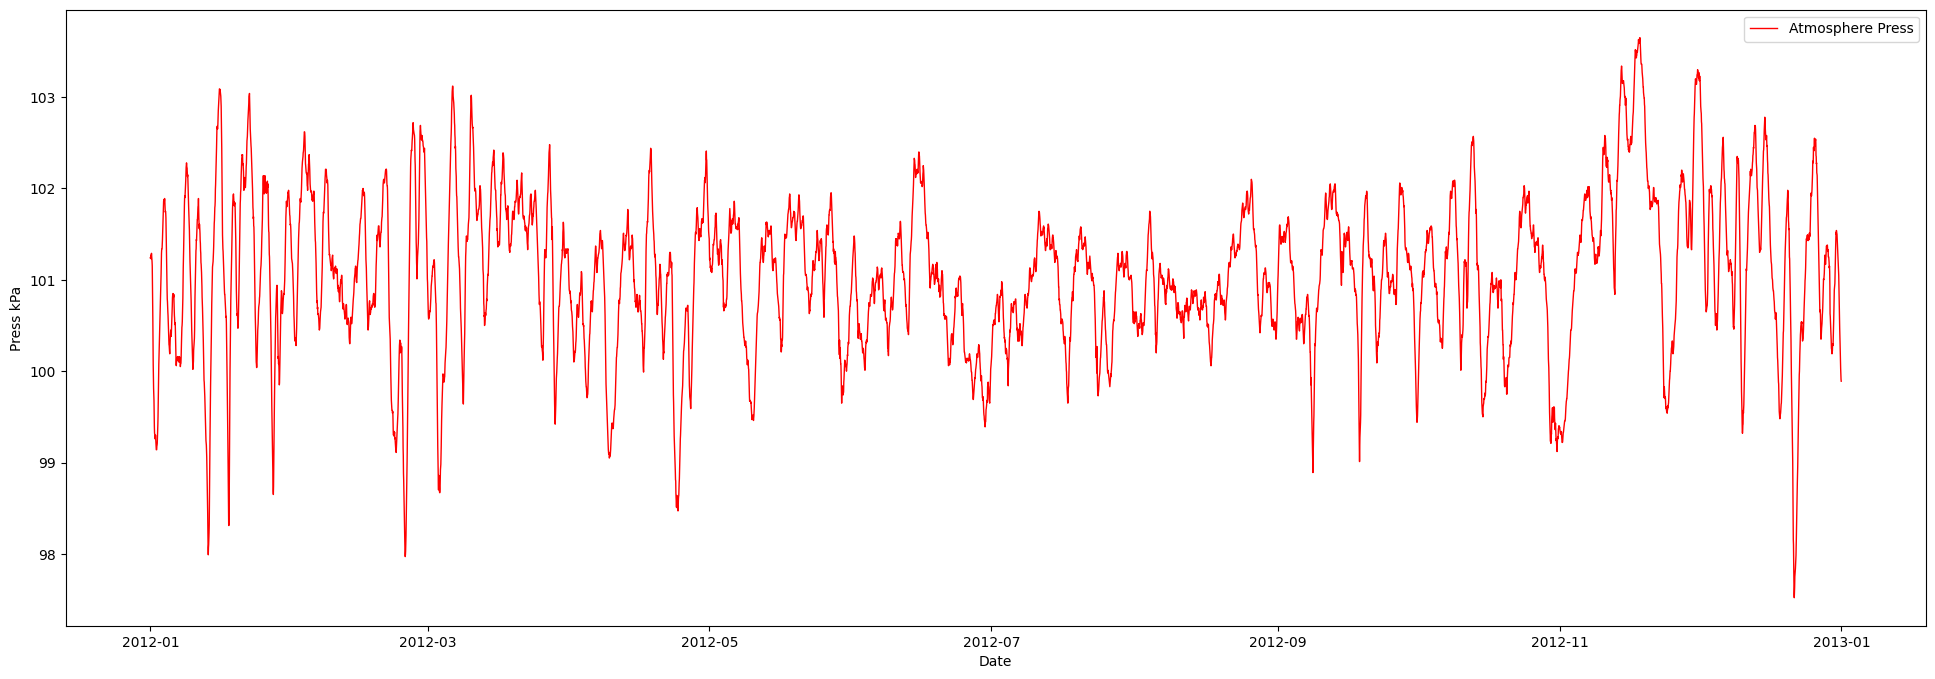

In [24]:
plt.figure(figsize=(24, 8))
plt.plot(data['Date/Time'], data['Press_kPa'], color='red', linewidth= 1, label='Atmosphere Press')
plt.xlabel('Date')
plt.ylabel('Press kPa')
plt.legend()
plt.show()

<h3>Q6 : Apakah Tingkat Kelembapan berada pada tingkat Optimal</h3>

<p>tingkat kelembapan optimal pada kisaran 40-60 persen</p>

In [31]:
RataRata_Hum = data['Rel Hum_%'].mean()
print('Nilai rata-rata kelembapan selama satu tahun ini adalah ', RataRata_Hum)
if 40 <= RataRata_Hum <= 60: 
    print('Kelembapan tahun ini berada pada tingkat yang optimal')
else:    
    print('Kelembapan tahun ini tidak berada di tingkat optimal')

Nilai rata-rata kelembapan selama satu tahun ini adalah  67.43169398907104
Kelembapan tahun ini tidak berada di tingkat optimal


<h3>Q7 : Korelasi antara Parameter Cuaca</h3>

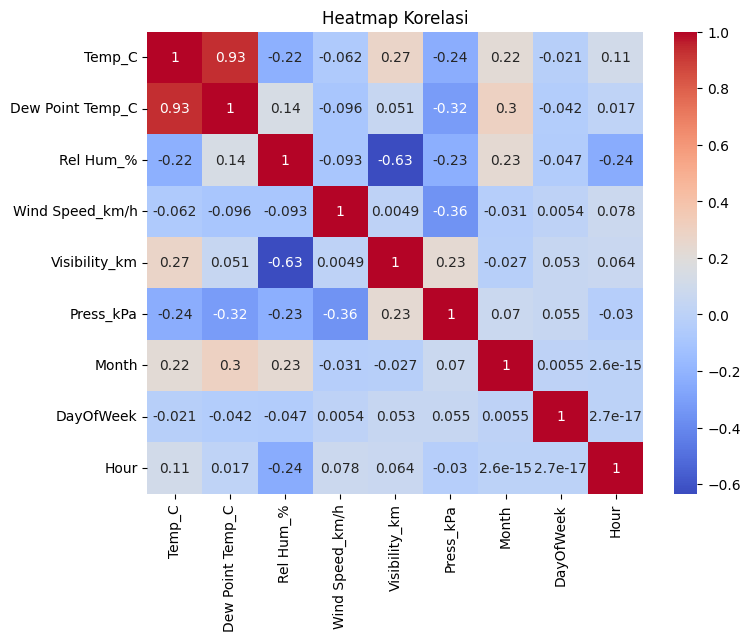

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

<h3>Q8 : Cuaca paling sering sepanjang tahun</h3>

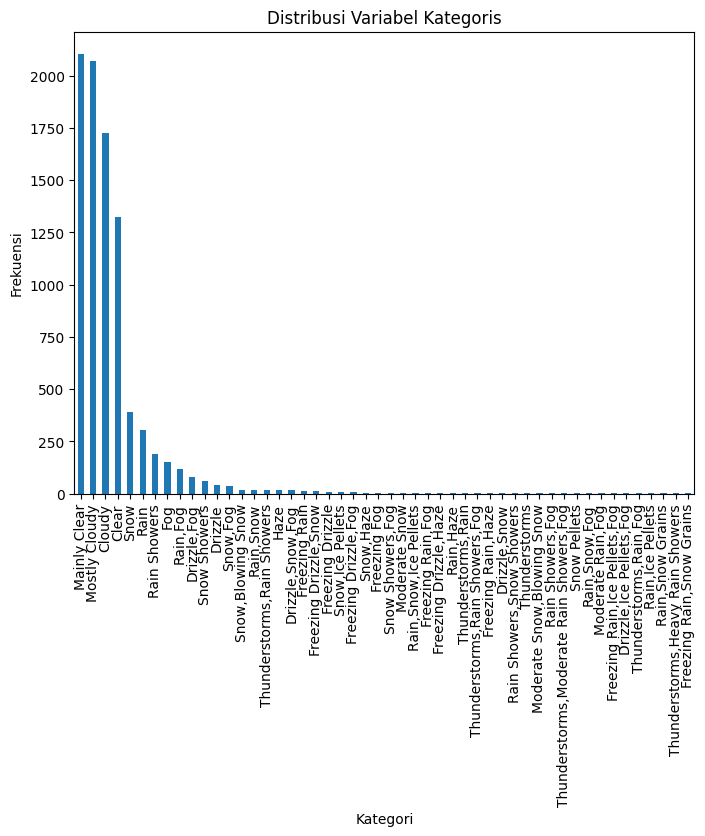

In [33]:
plt.figure(figsize=(8, 6))
data['Weather'].value_counts().plot(kind='bar')
plt.title('Distribusi Variabel Kategoris')
plt.xlabel('Kategori')
plt.ylabel('Frekuensi')
plt.show()

<h3>Q9 : Prediksi Kondisi Cuaca Mendatang</h3>

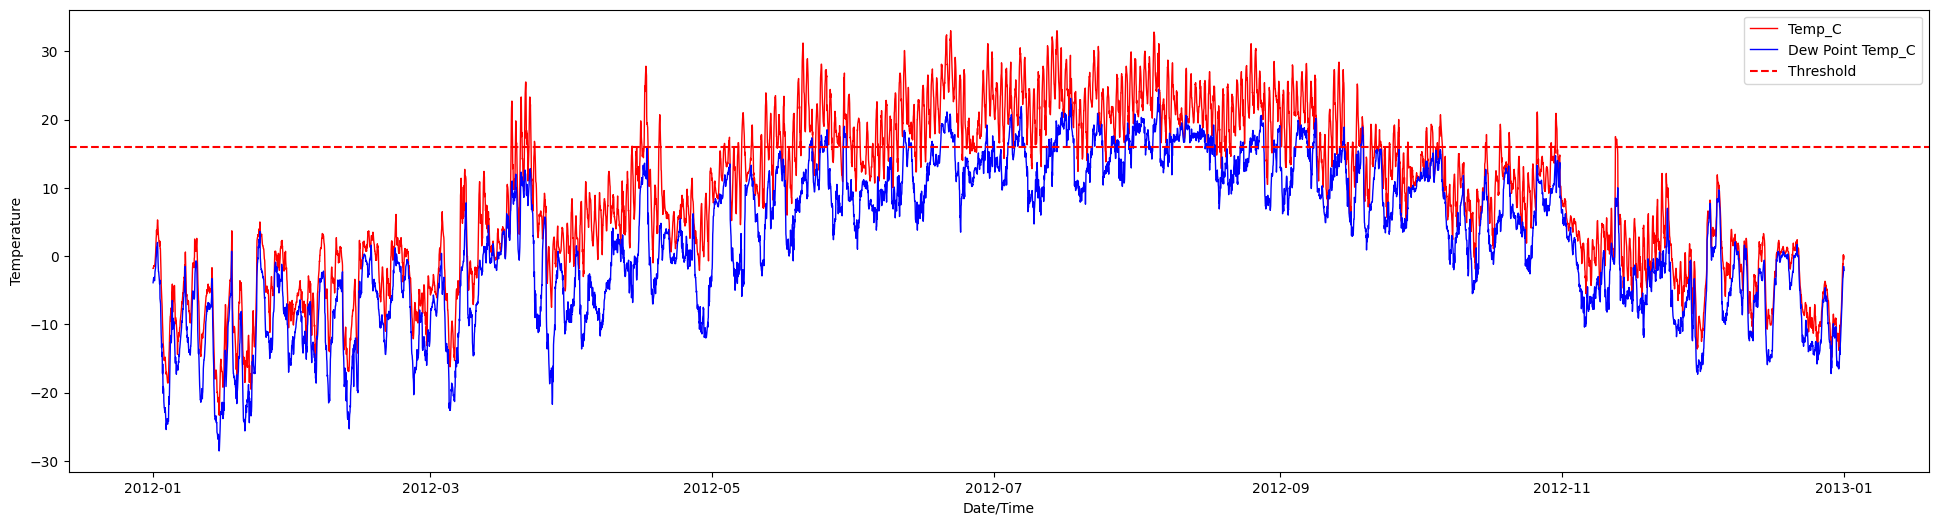

In [34]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

plt.figure(figsize=(24, 6))
plt.plot(data['Date/Time'], data['Temp_C'], color = 'red', linewidth=1, label="Temp_C")
plt.plot(data['Date/Time'], data['Dew Point Temp_C'], color='blue', linewidth = 1, label='Dew Point Temp_C')
plt.axhline(y=16, color='red', linestyle='--', label='Threshold')
plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

<p>Jika dilihat dari grafik suhu dan titik embun sepanjang tahun kemungkinan besar pola akan terulang kembali pada januari mendatang dimana akan mulai memasuki musim dingin</p>

<h3><b>Kesimpulan penting pada analisis data diatas<b></h3>

<p>1. <b>Tren Suhu Rendah Awal Tahun:</b> Awal tahun cenderung memiliki suhu yang lebih rendah. Warga yang berencana bepergian sebaiknya mempersiapkan pakaian yang sesuai untuk suhu rendah dan cuaca dingin.</p>

<p>2. <b>Varian Suhu Ekstrem</b> Meskipun suhu cenderung rendah di awal tahun, perubahan suhu ekstrim bisa terjadi. Persiapan yang baik termasuk membawa pakaian hangat yang dapat disesuaikan dengan variasi suhu yang mungkin terjadi.</p>

<p>3. <b>Polusi Udara dan Visibilitas:</b> Ada potensi untuk polusi udara dan visibilitas yang terpengaruh oleh cuaca. Warga yang memiliki sensitivitas terhadap polusi udara perlu mempertimbangkan penggunaan masker atau mengurangi aktivitas di luar ruangan jika kualitas udara buruk.</p>

<p>4. <b>Perubahan Mendadak dalam Kecepatan Angin:</b> Lonjakan kecepatan angin yang tinggi terlihat pada bulan-bulan ganjil. Pengemudi atau pelaut perlu waspada terhadap perubahan tiba-tiba dalam kecepatan angin yang dapat mempengaruhi perjalanan.</p>

<p>5. <b>Potensi Cuaca Buruk:</b> Cuaca variatif seperti salju atau hujan mungkin terjadi. Perjalanan harus direncanakan dengan mempertimbangkan kondisi cuaca aktual dan perubahan yang mungkin terjadi selama perjalanan.</p>

<p>6. <b>Pemantauan Perkiraan Cuaca:</b> Penting untuk terus memantau perkiraan cuaca terkini sebelum bepergian dan selama perjalanan. Ini dapat membantu dalam menyesuaikan rencana perjalanan dan mempersiapkan diri dengan baik terhadap perubahan cuaca yang mungkin terjadi.</p>

<p>7. <b>Keamanan dan Keselamatan:</b> Selalu prioritaskan keamanan dan keselamatan. Jika kondisi cuaca buruk atau tidak memungkinkan untuk melakukan perjalanan, lebih baik menunda atau menyesuaikan rencana perjalanan demi keselamatan Anda.</p>

<p>8. <b>Persiapan dalam Perjalanan:</b> Selalu membawa perlengkapan darurat dan kontak penting saat bepergian. Hal ini termasuk pakaian hangat, persediaan makanan dan air, serta nomor darurat yang relevan.</p>

<p>Peringatan ini dapat membantu warga untuk merencanakan perjalanan mereka dengan lebih baik dan lebih siap menghadapi kondisi cuaca yang mungkin berubah-ubah, meningkatkan kesadaran dan keselamatan mereka selama perjalanan.</p>